0.0
0.5773502691896257
1.7320508075688772
0.7071067811865476
2.01038968030247
0.7071067811865476
9.169696468985945
1.848422751068236
38.138453910281505
19.74525259397813
3.758324094593227
0.45643546458763845
1.224744871391589
11.547005383792516
133.58361925525648
7.8235754826890584
2.327373340628157
0.45643546458763845
1.3385315336840842
4.920196473041837
8.190441583537076
0.408248290463863
0.45643546458763845
0.9354143466934853
0.0


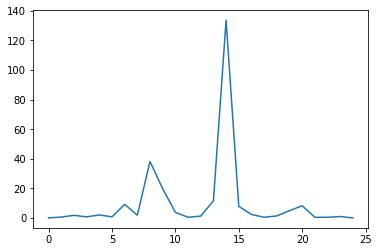

In [1]:
import numpy as np
Y=np.load("activeODTTHS3m_30.npy")

def dmd(X,q):

	svd = lambda X: np.linalg.svd(X, full_matrices=False)
	eig = np.linalg.eig
	X1 = X[:-2, :]
	X2 = X[1:-1 , :]
	X4= X[1:-1, : ]
	U, s, V = svd(X1)
	V = np.conjugate(V.T)
	if q is not None:
    
		U = U[:, 0:q]

		V = V[:, 0:q]

		s = s[0:q]
	s[s==0.00]=0.00001
	Sinverse = np.diag(1. / s)
	X2VSinverse = X2.dot(V).dot(Sinverse)
	Atilde = np.transpose(U).dot(X2VSinverse)
	eigs, W = eig(Atilde)
	Phi = X2VSinverse.dot(W)
	Eig = np.diag(eigs)
	Phitranspose=np.transpose(Phi)
	X3= Phi.dot(Eig).dot(Phitranspose).dot(X4)
	return Phi,Eig,X3

rows, cols = (2160, 25) 
arr = np.zeros((rows,cols),dtype=int)

for i in range (2160):

    for j in range(25):
        sum=0

        for k in range(25):
            sum=sum+Y[i][j][k]
        
        arr[i][j]=sum

a=np.asarray(arr)
r,c,w=(25,90,24)
ab=np.zeros((r,c,w),dtype=int)
for i in range(25):
    k=0
    t=0
    for j in range(2160):
        if(t<24):
            ab[i][k][t]=a[j][i]
        else:
            t=0
            k=k+1
            ab[i][k][t]=a[j][i]
        t=t+1
b=np.asarray(ab)
r=(25)
error_list=np.zeros(r,dtype=float)
for i in range(25):
	Phi,Eig,X3=dmd(b[i],24)
	r,c=(88,24)
	X5=np.zeros((r,c),dtype=int)
	for j in range(24):
		X5[87,j]=round(X3[87,j])
	rms_error=np.sqrt(np.mean(np.square(np.abs(b[i,89]-X5[87]))))
	print(rms_error)
	error_list[i]=rms_error
	
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

	
    





            

